In [1]:
import os
os.chdir("../") # go to parent dir

%load_ext autoreload
%autoreload 2

In [2]:
from evrptwv2g.utils.utilities import create_optimal_edges, create_json_out, update_instance_json, read_instance_json_str, \
    convert_txt_instances_to_csv, parse_csv_tables
from evrptwv2g.utils.plot import plot_interactive_graph, plot_evrptwv2g
from evrptwv2g.milp.evrptwv2g_base import EVRPTWV2G

import pandas as pd
import numpy as np

import json

import logging.config
logging.config.fileConfig('./evrptwv2g/config/loggingconfig.ini')

pd.options.plotting.backend = "plotly"

# Convert Schneider instance to E-VRP-TW-V2G

In [12]:
schneider_instance = 'r105C5'
convert_txt_instances_to_csv(schneider_instance)

# Create Distance Matrix CSV using Google API

In [4]:
instance_filepath = '../instances/v2g_m06_s7_ca.csv'
m = EVRPTWV2G(problem_type='Schneider Cycle', dist_type='googlemaps', save_dist_matrix=True)
m.import_instance(instance_filepath)

 # Full solve

Objective options include: {Schneider} OR {OpEx, CapEx, Cycle, EA, DCM, Delivery}

Constraint options include: {Start=End, FullStart=End, NoXkappaBounds, NoMinVehicles, MaxVehicles, NoSymmetry, NoXd, SplitXp, StationaryEVs, NoExport}

In [4]:
instance = 'r105c5_'  # c101C10_
fpath = f'../instances/test_instances/{instance}.csv'

In [5]:
m = EVRPTWV2G(problem_type='Schneider Cycle', dist_type='scipy')
m.full_solve(fpath)

2021-09-14 04:12:11 INFO     Building abstract model
2021-09-14 04:12:11 INFO     Defining parameters and sets
2021-09-14 04:12:11 INFO     Defining variables
2021-09-14 04:12:11 INFO     Defining constraints
2021-09-14 04:12:11 INFO     Importing EVRPTW MILP instance: r105c5_
2021-09-14 04:12:11 INFO     Reading CSV
2021-09-14 04:12:11 INFO     Creating graph
2021-09-14 04:12:11 INFO     Creating timeseries data
2021-09-14 04:12:11 INFO     Creating duplicates and extended graph
2021-09-14 04:12:11 INFO     Calculating distance matrix
2021-09-14 04:12:11 INFO     Using Scipy euclidian distances to generate distance matrix
2021-09-14 04:12:11 INFO     Creating parameters
2021-09-14 04:12:11 INFO     Creating instance
2021-09-14 04:12:12 INFO     Problem type: Schneider Cycle
2021-09-14 04:12:12 INFO     Solving instance...
Academic license - for non-commercial use only - expires 2021-10-18
Using license file /Users/ramiariss/gurobi.lic
Read LP format model from file /var/folders/vv/1p3

In [24]:
print(m.results)


Problem: 
- Name: x1803
  Lower bound: 1419.511507736144
  Upper bound: 1895.156
  Number of objectives: 1
  Number of constraints: 18308
  Number of variables: 1803
  Number of binary variables: 979
  Number of integer variables: 979
  Number of continuous variables: 824
  Number of nonzeros: 152250
  Sense: minimize
Solver: 
- Status: aborted
  Return code: 0
  Message: Optimization terminated because the time expended exceeded the value specified in the TimeLimit parameter.
  Termination condition: maxTimeLimit
  Termination message: Optimization terminated because the time expended exceeded the value specified in the TimeLimit parameter.
  Wall time: 120.0137369632721
  Error rc: 0
  Time: 120.31637191772461
Solution: 
- number of solutions: 0
  number of solutions displayed: 0



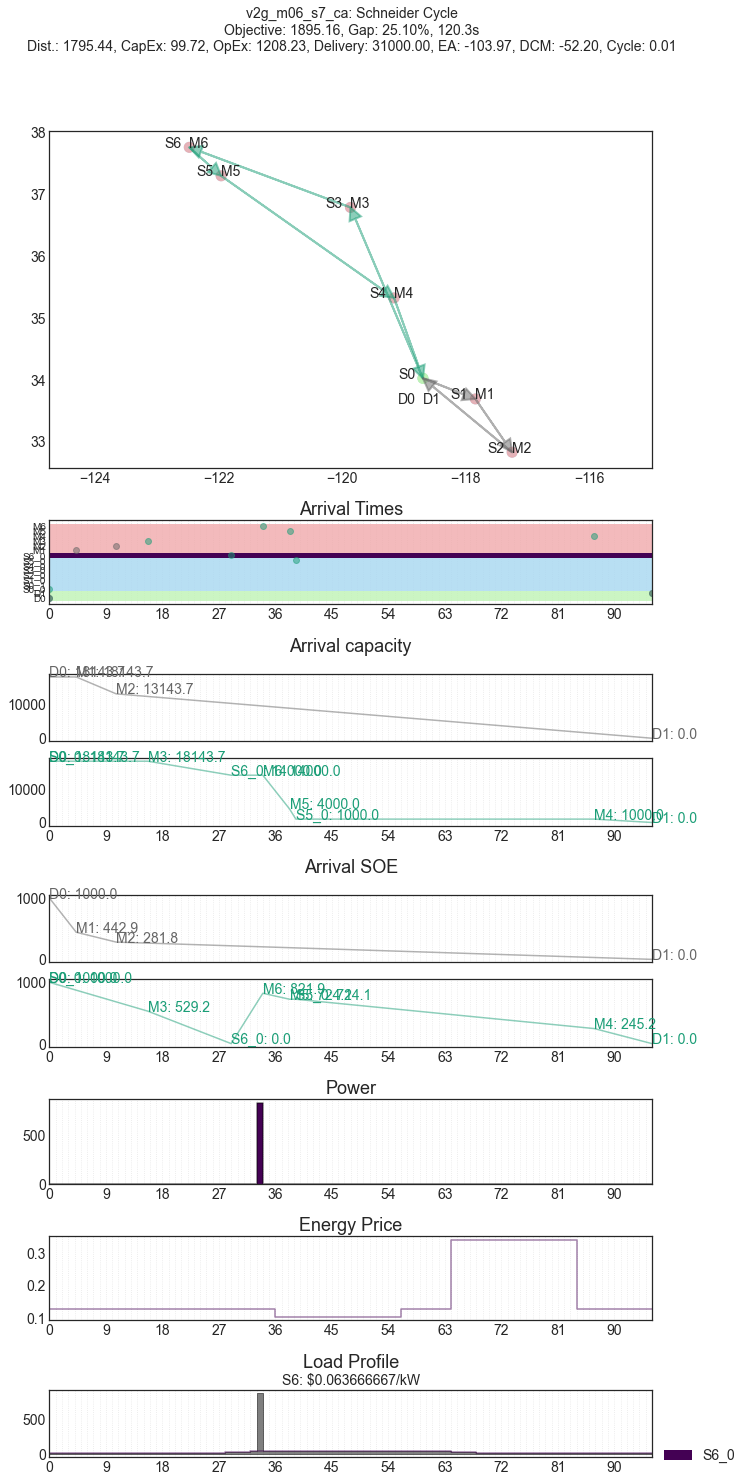

In [27]:
x, xp, traces, routes = plot_evrptwv2g(m, save=True)

In [28]:
routes

state         xw        xq           xa
from to                                           
D0   S0_0    1.0   0.000000  18143.68  1000.000000
     D0      NaN   0.000000  18143.68  1000.000000
     M1      1.0   4.262120  18143.68   442.910758
M1   M2      1.0  10.633183  13143.68   281.778866
S0_0 M3      1.0  15.694550  18143.68   529.163508
M3   S6_0    1.0  28.954275  14000.00     0.000000
S6_0 M6      1.0  34.000000  14000.00   821.867349
M6   M5      1.0  38.258769   4000.00   724.104291
M5   S5_0    1.0  39.258769   1000.00   724.104291
S5_0 M4      1.0  86.827664   1000.00   245.170070
M2   D1      1.0  96.000000      0.00     0.000000
M4   D1      1.0  96.000000      0.00     0.000000

In [57]:
m.data['d']

,D0,D1,S0_0,S1_0,S3_0,S16_0,S20_0,C98,C78,C4,C13,C95,C100,C54,C27,C89,C96
D0,0.000000,0.000000,0.000000,37.054015,36.235342,42.755117,53.460266,30.805844,50.289164,18.110770,30.805844,37.202150,38.078866,40.049969,17.117243,24.351591,36.055513
D1,0.000000,0.000000,0.000000,37.054015,36.235342,42.755117,53.460266,30.805844,50.289164,18.110770,30.805844,37.202150,38.078866,40.049969,17.117243,24.351591,36.055513
S0_0,0.000000,0.000000,0.000000,37.054015,36.235342,42.755117,53.460266,30.805844,50.289164,18.110770,30.805844,37.202150,38.078866,40.049969,17.117243,24.351591,36.055513
S1_0,37.054015,37.054015,37.054015,0.000000,36.055513,52.697249,18.357560,29.832868,20.248457,38.483763,59.615434,31.764760,39.661064,54.671748,54.000000,15.231546,32.756679
S3_0,36.235342,36.235342,36.235342,36.055513,0.000000,74.545288,53.075418,7.071068,56.302753,20.518285,35.693137,5.385165,3.605551,73.545904,45.343136,24.738634,3.605551
S16_0,42.755117,42.755117,42.755117,52.697249,74.545288,0.000000,57.008771,67.742158,48.259714,60.299254,71.867934,73.348483,77.317527,6.324555,50.606324,52.201533,72.993150
S20_0,53.460266,53.460266,53.460266,18.357560,53.075418,57.008771,0.000000,47.423623,9.433981,56.797887,77.878110,48.270074,56.639209,60.745370,70.576200,33.541020,49.578221
C98,30.805844,30.805844,30.805844,29.832868,7.071068,67.742158,47.423623,0.000000,50.000000,17.464249,36.000000,6.403124,10.440307,66.940272,41.880783,17.720045,5.385165
C78,50.289164,50.289164,50.289164,20.248457,56.302753,48.259714,9.433981,50.000000,0.000000,56.612719,77.175126,51.971146,59.908263,52.354560,67.186308,33.970576,53.000000
C4,18.110770,18.110770,18.110770,38.483763,20.518285,60.299254,56.797887,17.464249,56.612719,0.000000,21.189620,23.323808,21.400935,58.000000,24.839485,23.259407,21.633308


# Archive, fix route, modify objective, and warmstart solve

In [ ]:
m.archive_instance_result()

In [ ]:
m.fix_variables(['xgamma'])

In [ ]:
m.remake_objective(m.instance, 'Opex Capex EA DCM cycle')

In [ ]:
m.warmstart_solve()

In [ ]:
print(m.results)

In [ ]:
x, xp, traces, routes = plot_evrptwv2g(m)

# Archive, rebuild model to modify constraints, fix route, warmstart solve

In [ ]:
m.archive_instance_result()

In [ ]:
m.instance_archive

In [ ]:
m.remake_model('Opex Capex EA DCM cycle wsplitxgamma', fpath)

In [ ]:
m.set_xgamma('Opex Capex EA DCM cycle')

In [ ]:
m.fix_variables(['xgamma'])

In [ ]:
m.make_solver(solve_options={'TimeLimit': 60 * 5})

In [ ]:
m.warmstart_solve()

In [ ]:
x, xp, traces, routes = plot_evrptwv2g(m)

In [ ]:
routes

# Check infeasible constraints

In [ ]:
from pyomo.util.infeasible import log_infeasible_constraints

In [ ]:
log_infeasible_constraints(m.instance)